# Graficando con Pandas
Inteligencia Artificial - Facundo A. Lucianna - CEIA - FIUBA

Pandas nos da herramientas de graficado sin necesidad de llamar a Matplotlib o Seaborn.

In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Vamos a trabajar con datos de temperatura de diferentes ciudades:

In [2]:
city = pd.read_csv("./datasets/city_temperature.csv", low_memory=False)

In [3]:
# Transformemos la temperatura en Celsium
city["AvgTemperature"] = (city["AvgTemperature"] - 32) * 5/9
# Temperaturas que estan fuera de escala por error, la reemplazamos por NaN
city.loc[city["AvgTemperature"] < -50, "AvgTemperature"] = np.nan
# Completamos los datos faltante con el dia anterior
city["AvgTemperature"] = city["AvgTemperature"].fillna(method="ffill")
# Dropeamos las columnas que no usamos
city.drop(["Region", "State"], axis=1, inplace=True)
# Reemplazamos con NaN algunos dias
city.loc[city["Day"] > 28, "Day"] = np.nan
city.loc[city["Day"] < 1, "Day"] = np.nan
# Creamos la columna "date" 
city["date"] = pd.to_datetime(city[["Year", "Month", "Day"]])

# Nos quedamos con la ciudad de Buenos Aires
BuenosAires = city[city["City"] == "Buenos Aires"].copy()

In [4]:
BuenosAires.head()

,Country,City,Month,Day,Year,AvgTemperature,date
0,Argentina,Buenos Aires,1,1.0,1995,28.000000,1995-01-01
1,Argentina,Buenos Aires,1,2.0,1995,23.944444,1995-01-02
2,Argentina,Buenos Aires,1,3.0,1995,23.166667,1995-01-03
3,Argentina,Buenos Aires,1,4.0,1995,25.055556,1995-01-04
4,Argentina,Buenos Aires,1,5.0,1995,26.388889,1995-01-05


## Graficamos usando el método .plot()

Para poder graficar, elegimos una columna y usamos el metodo .plot(). Al hacer esto, nos genera una figura de matplotlib con los datos de la columna.

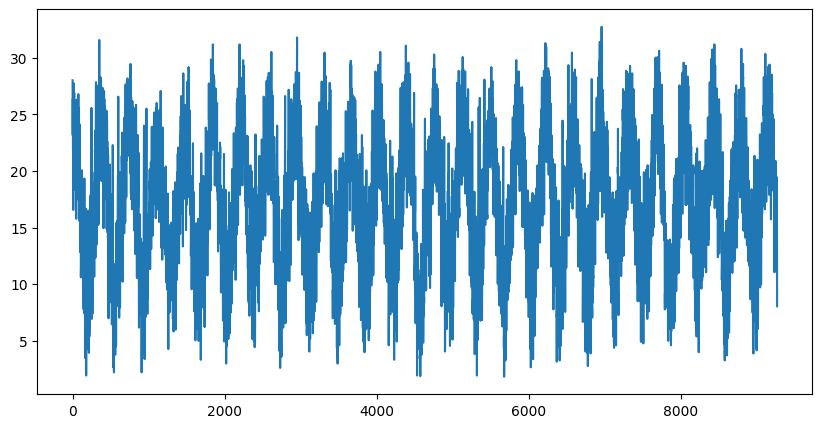

In [5]:
BuenosAires["AvgTemperature"].plot(figsize=(10,5));

In [6]:
# Guardamos como indice a la fecha
BuenosAiresDate = BuenosAires.set_index("date")

In [7]:
BuenosAiresDate.head()

,Country,City,Month,Day,Year,AvgTemperature
date,,,,,,
1995-01-01,Argentina,Buenos Aires,1,1.0,1995,28.000000
1995-01-02,Argentina,Buenos Aires,1,2.0,1995,23.944444
1995-01-03,Argentina,Buenos Aires,1,3.0,1995,23.166667
1995-01-04,Argentina,Buenos Aires,1,4.0,1995,25.055556
1995-01-05,Argentina,Buenos Aires,1,5.0,1995,26.388889


Al guardar como indice a la fecha, se pone en el eje de las absisas al nuevo indice

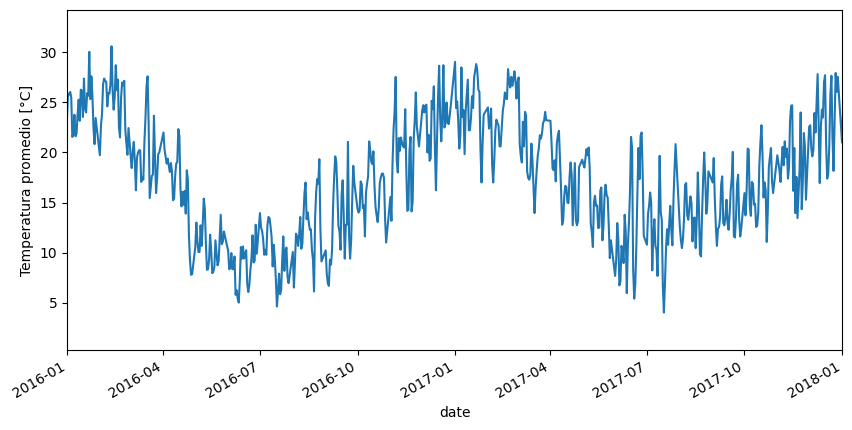

In [8]:
BuenosAiresDate["AvgTemperature"].plot(figsize=(10,5))
# Ademas podemos manipular la figura con matplotlib
plt.ylabel("Temperatura promedio [°C]")
plt.xlim([datetime.datetime(2016,1,1), datetime.datetime(2018,1,1)]);

Si llamamos al método .plot() sin discriminar la columna, Pandas grafica todas las columnas numéricas

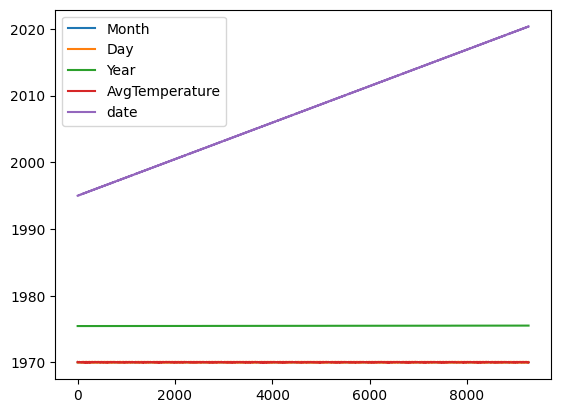

In [9]:
BuenosAires.plot();

Podemos graficar más de un dataframe en una misma figura

In [10]:
Lima = city[city["City"] == "Lima"].copy()
Brasilia = city[city["City"] == "Brasilia"].copy()

Lima.set_index(["date"], inplace=True)
Brasilia.set_index(["date"], inplace=True)
BuenosAires.set_index(["date"], inplace=True)

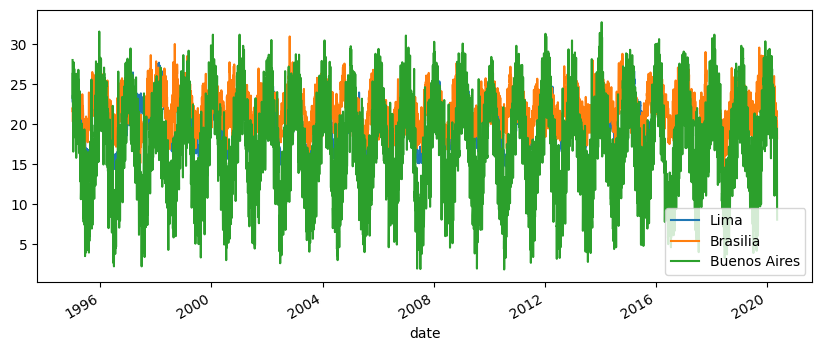

In [11]:
Lima["AvgTemperature"].plot(figsize=(10,4))
Brasilia["AvgTemperature"].plot()
BuenosAires["AvgTemperature"].plot()
plt.legend(["Lima", "Brasilia", "Buenos Aires"]);

Y combinando con matplotlib armar graficos más avanzados:

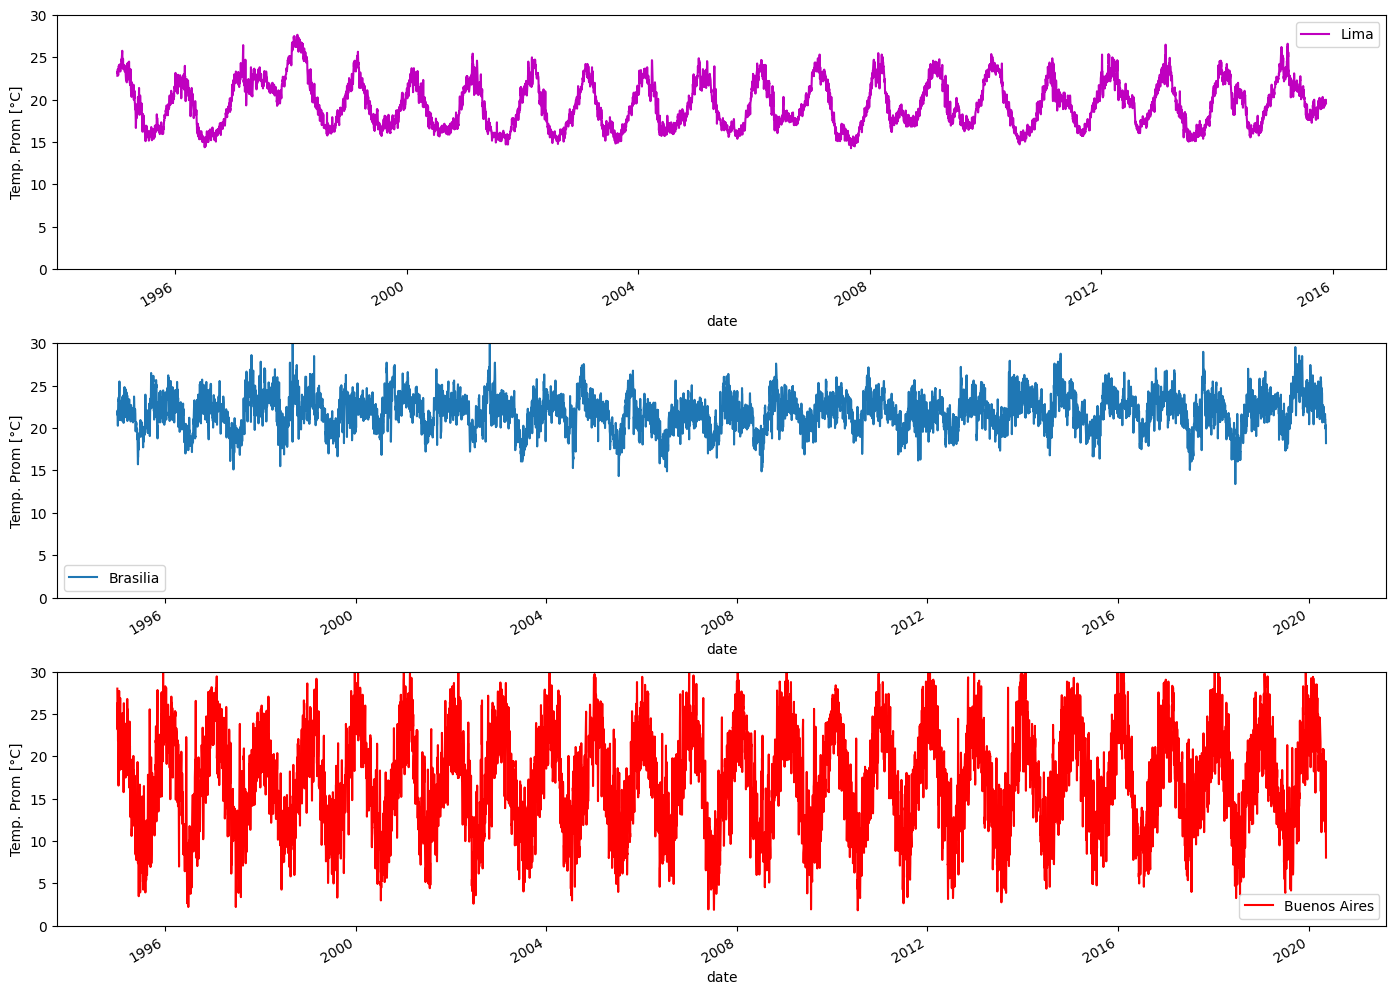

In [12]:
fig, ax = plt.subplots(3,1, figsize=(14,10))
Lima["AvgTemperature"].plot(ax=ax[0], color="m")
Brasilia["AvgTemperature"].plot(ax=ax[1])
BuenosAires["AvgTemperature"].plot(ax=ax[2], color="r")
ax[0].legend(["Lima"])
ax[1].legend(["Brasilia"])
ax[2].legend(["Buenos Aires"])
plt.tight_layout()
ax[0].set_ylabel("Temp. Prom [°C]")
ax[1].set_ylabel("Temp. Prom [°C]")
ax[2].set_ylabel("Temp. Prom [°C]")

ax[0].set_ylim([0, 30])
ax[1].set_ylim([0, 30])
ax[2].set_ylim([0, 30]);

## Otro tipos de gráfico

No solo podemos realizar graficos de linea, sino graficos de barra, histogramas, etc.

### Gráfico de barra

Podemos realizar graficos de barra. Por ejemplo, veamos con el siguiente DataFrame

In [13]:
wine = pd.read_csv("./datasets/winequality-red.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Usando el metodo plot.bar() podemos realizar un grafico de barra de las filas 4 a 7 y columnas "pH", "fixed acidity", "residual sugar":

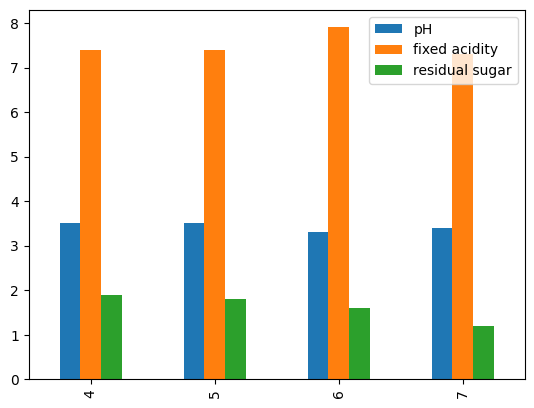

In [14]:
wine[["pH", "fixed acidity", "residual sugar"]].iloc[4:8].plot.bar();

Con el argumento stacked, las barra se ponen una encima de la otra

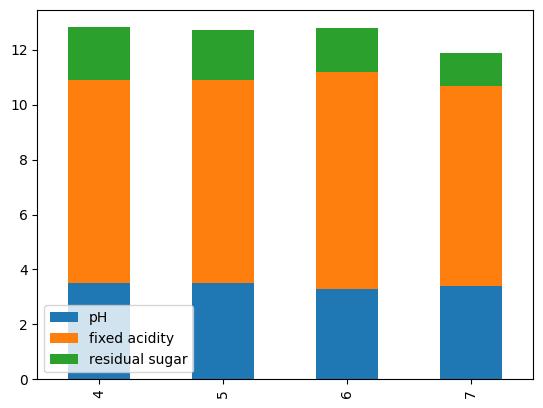

In [15]:
wine[["pH", "fixed acidity", "residual sugar"]].iloc[4:8].plot.bar(stacked=True);

### Histogramas

Pandas nos provee la posibilidad de graficar el histograma de una columna, usando plot.hist(), el cual nos permite ver la distribución de esa columna

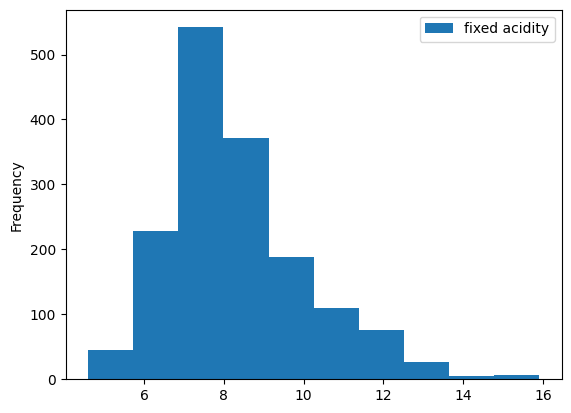

In [16]:
wine[["fixed acidity"]].plot.hist();

Eligiendo más de una columna, nos coloca los dos histogramas juntos. Además usando los argumentos opcionales podemos definir un nivel de transparencia, en cuanto pedazos dividirlos o ver el histograma acumulativo:

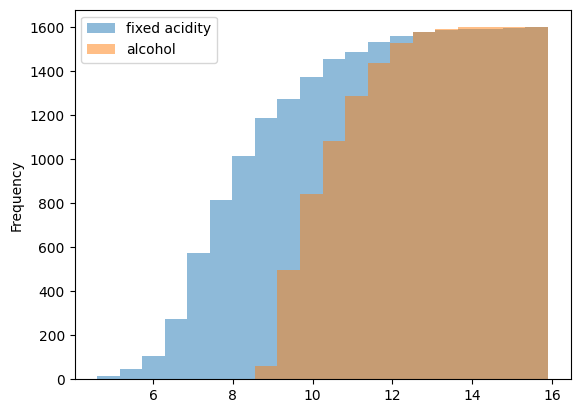

In [17]:
wine[["fixed acidity", "alcohol"]].plot.hist(alpha=0.5, bins=20, cumulative=True);

Si llamamos al método .hist() del DataFrame, crea un histograma por columna, separando en graficos diferentes cada columna

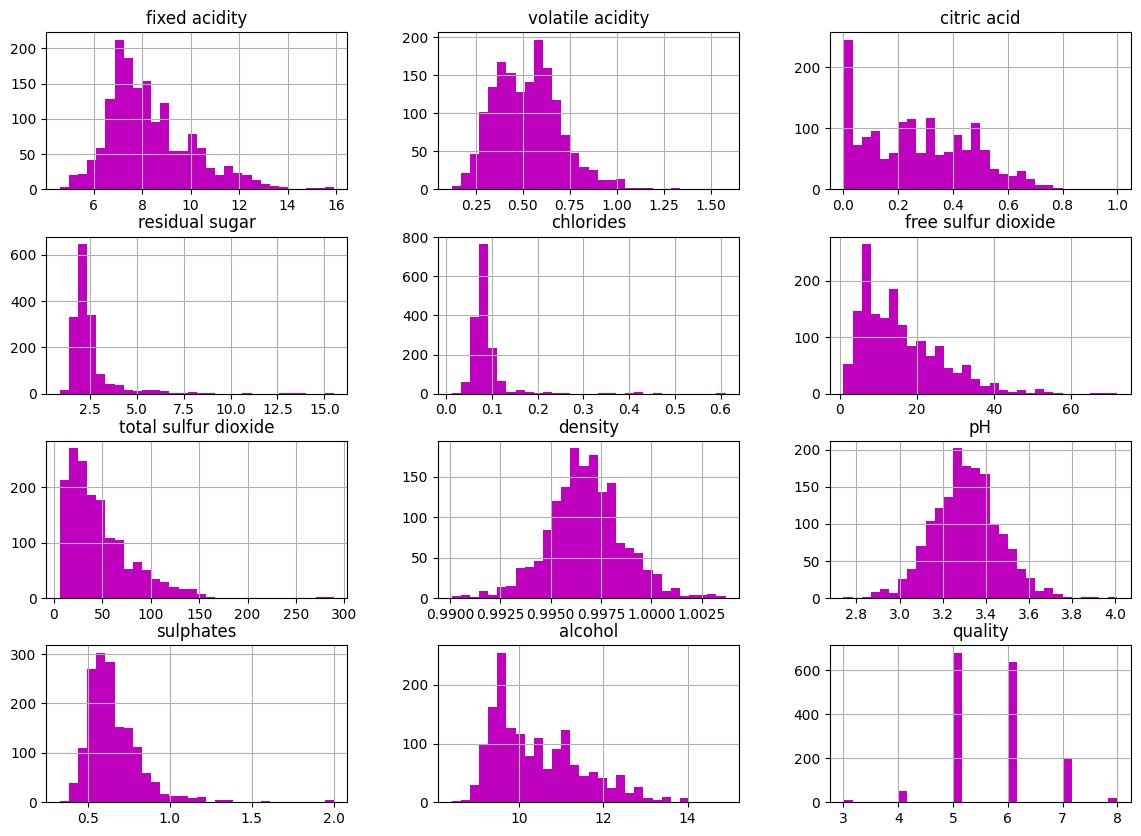

In [18]:
wine.hist(figsize=(14, 10), bins=30, color="m");

### Boxplot

Podemos armar gráficos de cajas para cada columna del DataFrame, usando el método .plot.box()

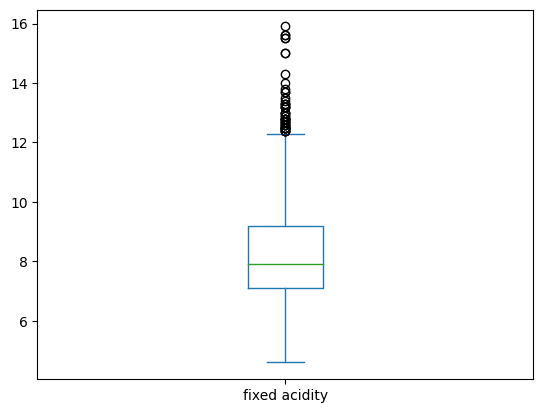

In [19]:
wine["fixed acidity"].plot.box();

Combinando a todas las graficas que vimos, podemos hacer un EDA que nos de una idea de como es el comportamiento de las temperaturas en Buenos Aires, Brasilia y Lima

In [20]:
temperatures = pd.concat([Lima.reset_index(), BuenosAires.reset_index(drop=True), Brasilia.reset_index(drop=True)], axis=1)
temperatures = temperatures[["date", "AvgTemperature"]]
temperatures.columns = ["date", "Lima", "Buenos Aires", "Brasilia"]

temperatures.dropna(inplace=True)

El grafico de caja nos permite ver donde están ubicado la mayoria de los datos, y cuales son sus medidas de centralidad y dispersión

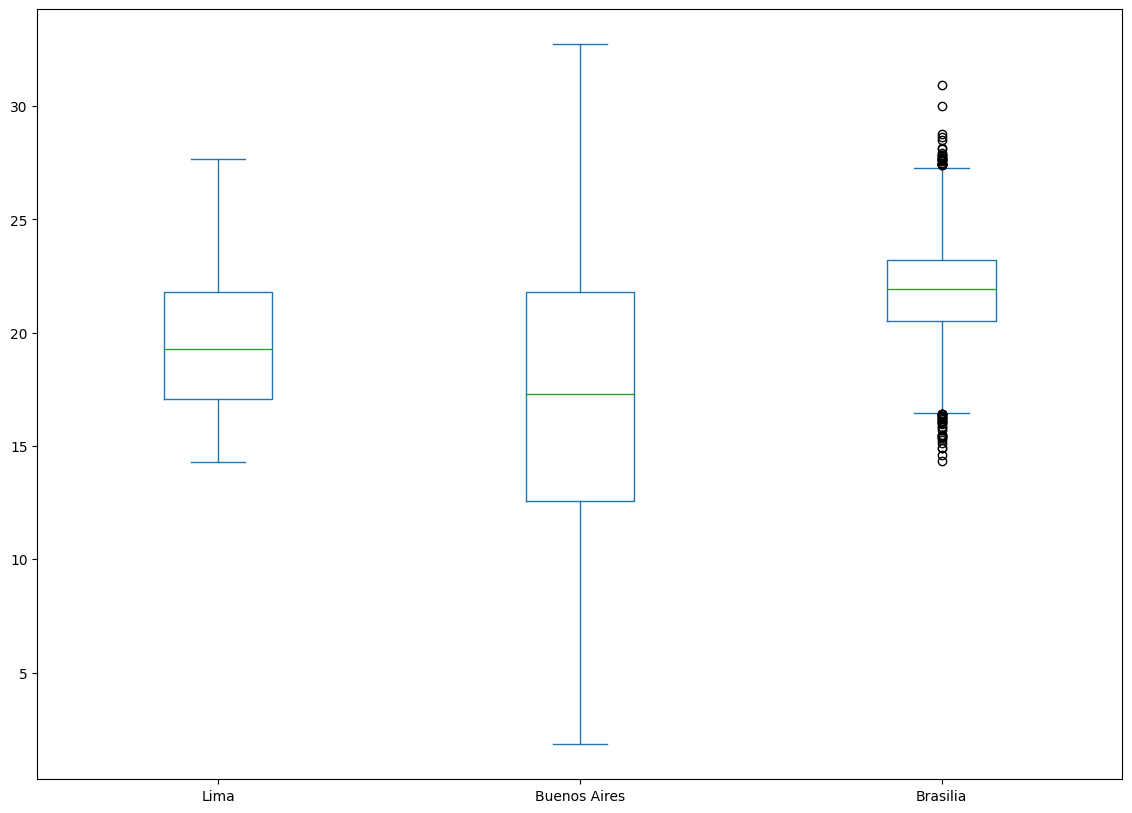

In [21]:
temperatures.plot.box(figsize=(14, 10));

El histograma nos da una mejor visualización de la distribución de datos:

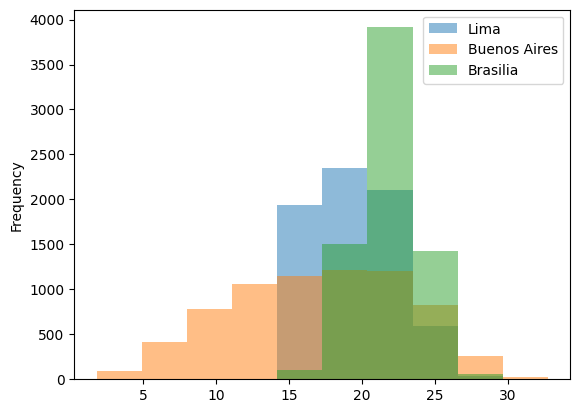

In [22]:
temperatures.plot.hist(alpha=0.5);

Y finalmente, la grafica de temperatura durante los años de las tres ciudades:

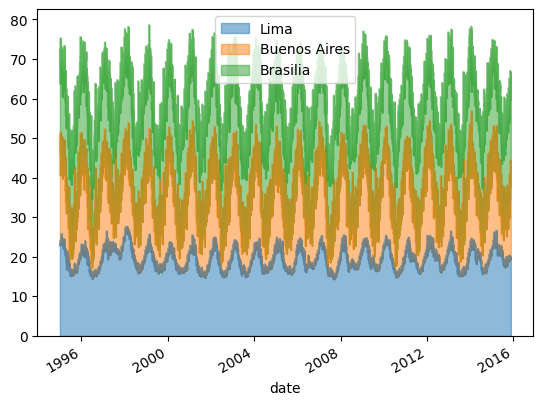

In [23]:
temperatures.set_index("date").plot.area(alpha=0.5);

### Scatter plot

Además de los gráficos que vimos, Pandas nos ofrece la posibilidad de realizar gráficos de dispersión. En este tipo de gráfico tenemos más control de quien queremos ubicar en cada eje, por ejemplo, en el dataset de vinos, tenemos en la columna **x** la acidez fija, y el en el eje **y** el pH

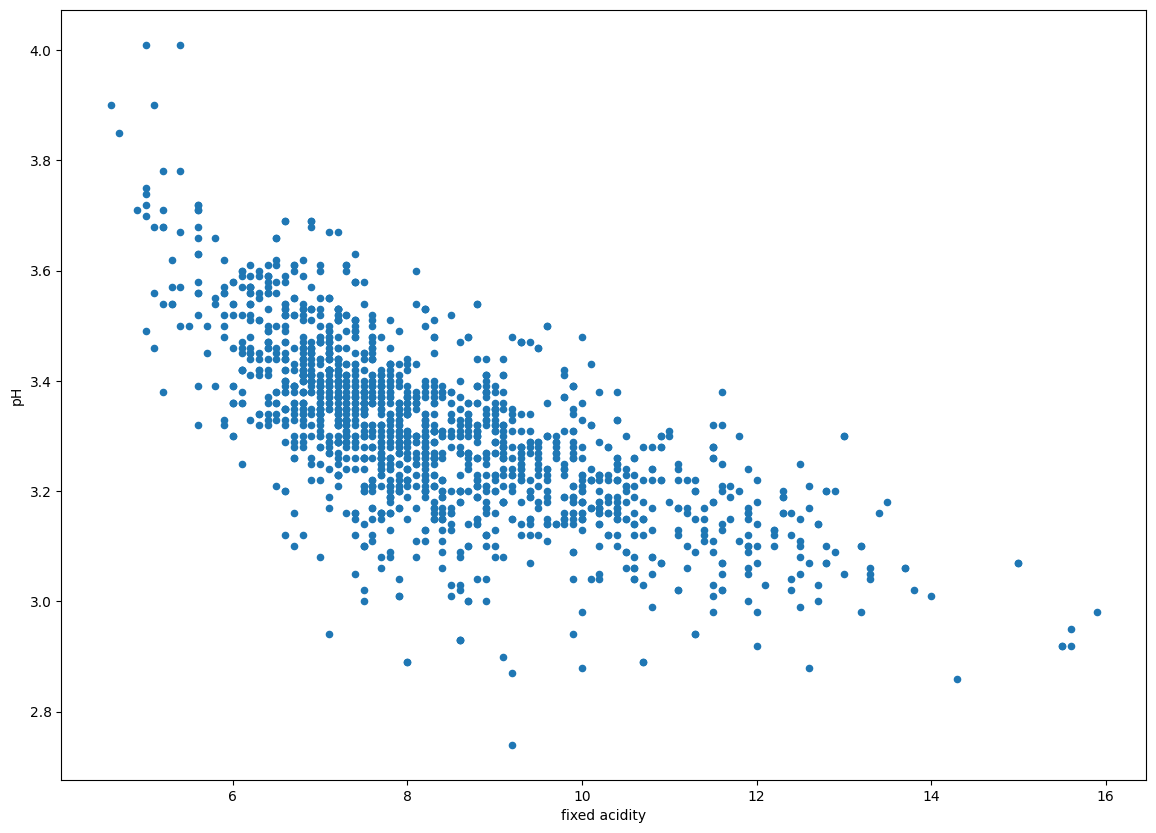

In [24]:
wine.plot.scatter(x="fixed acidity", y="pH", figsize=(14,10));

Además podemos dar información de colores a los puntos con el argumento **c** y dando el nombre de otra columna (en este caso calidad del vino)

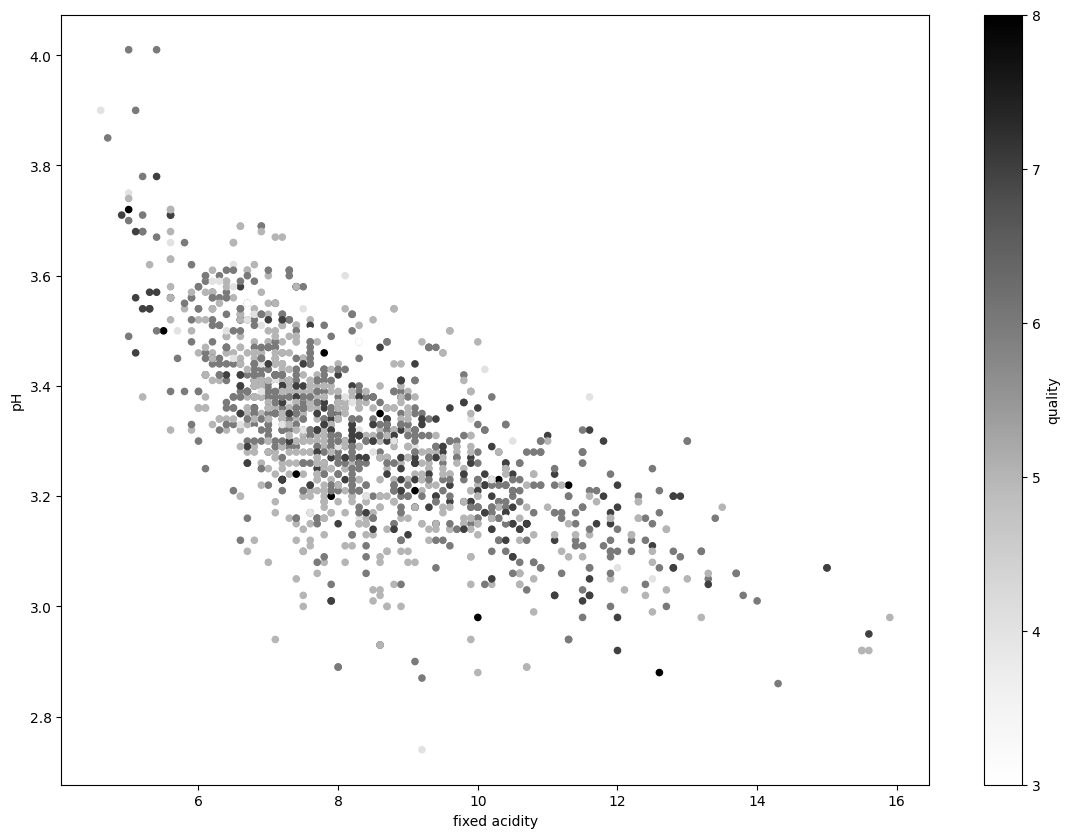

In [25]:
wine.plot.scatter(x="fixed acidity", y="pH", c="quality", figsize=(14,10));

Podemos modificar el estilo un poco más:

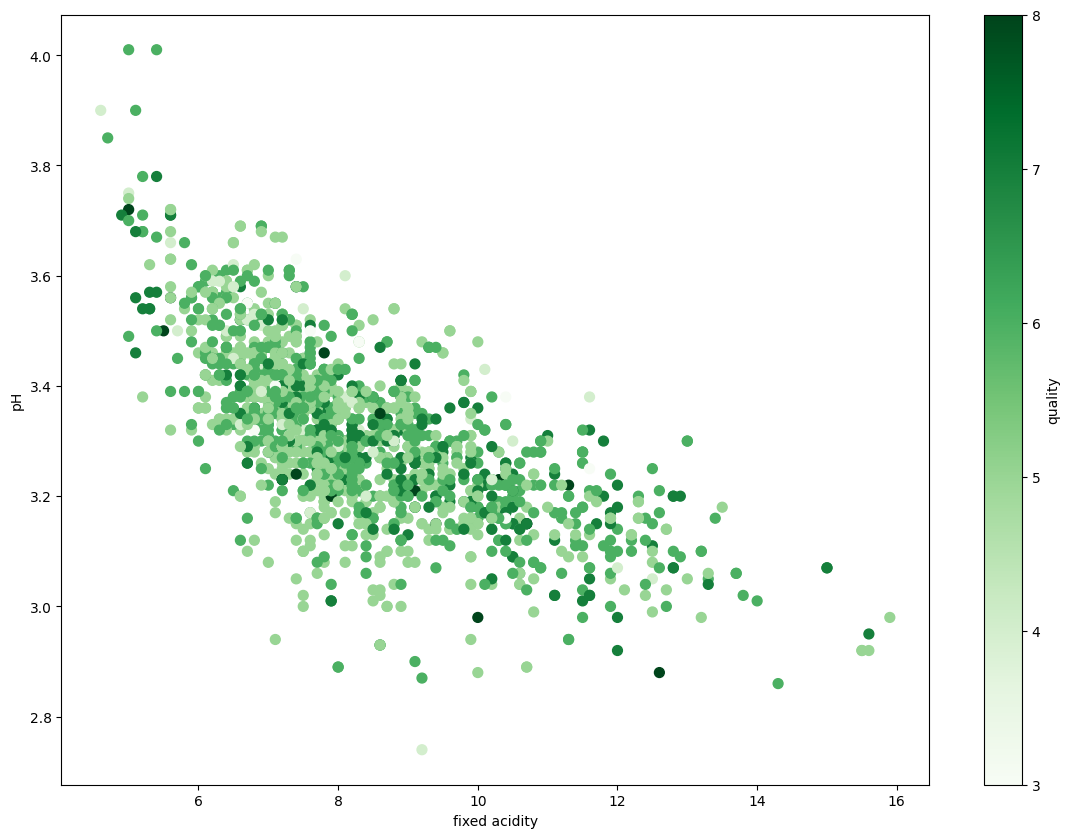

In [26]:
import matplotlib as mpl
wine.plot.scatter(x="fixed acidity", y="pH", c="quality", figsize=(14, 10), s=50, cmap=mpl.colormaps["Greens"]);

Al gráfico de dispersión podemos ademas codificar otra variable usando el tamaño del punto. En este caso usaremos la cantidad de alcohol, previo una normalización para que los puntos tengan sentido en la gráfica:

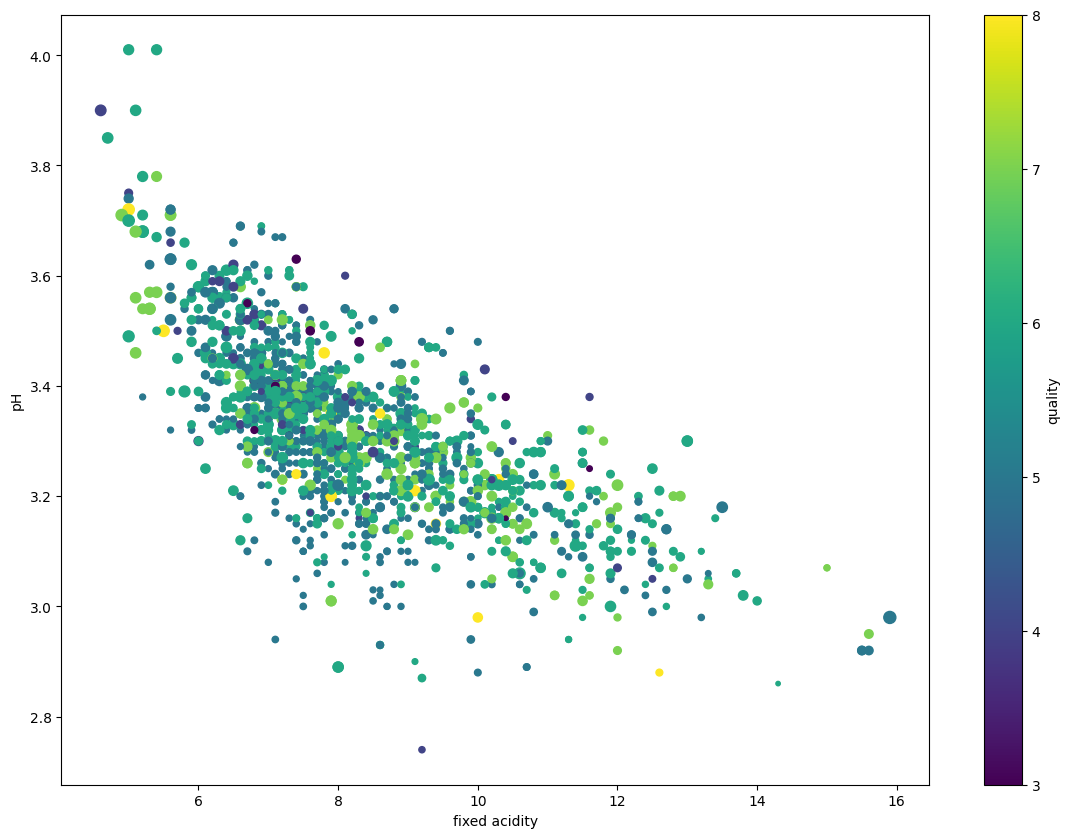

In [27]:
wine["alcohol_p"] = (wine["alcohol"] - wine["alcohol"].min() + 1) * 10

wine.plot.scatter(x="fixed acidity", y="pH", c="quality", s="alcohol_p", figsize=(14, 10), cmap=mpl.colormaps["viridis"]);

Hay situaciones que queremos dar color a los puntos que pertenecen a diferentes clases, pero estas clases son strings:

In [28]:
iris = pd.read_csv("./datasets/iris.data.csv", header=None)

iris.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]

Pandas no puede darle colores a los puntos si usamos una columna de color que tenga strings

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

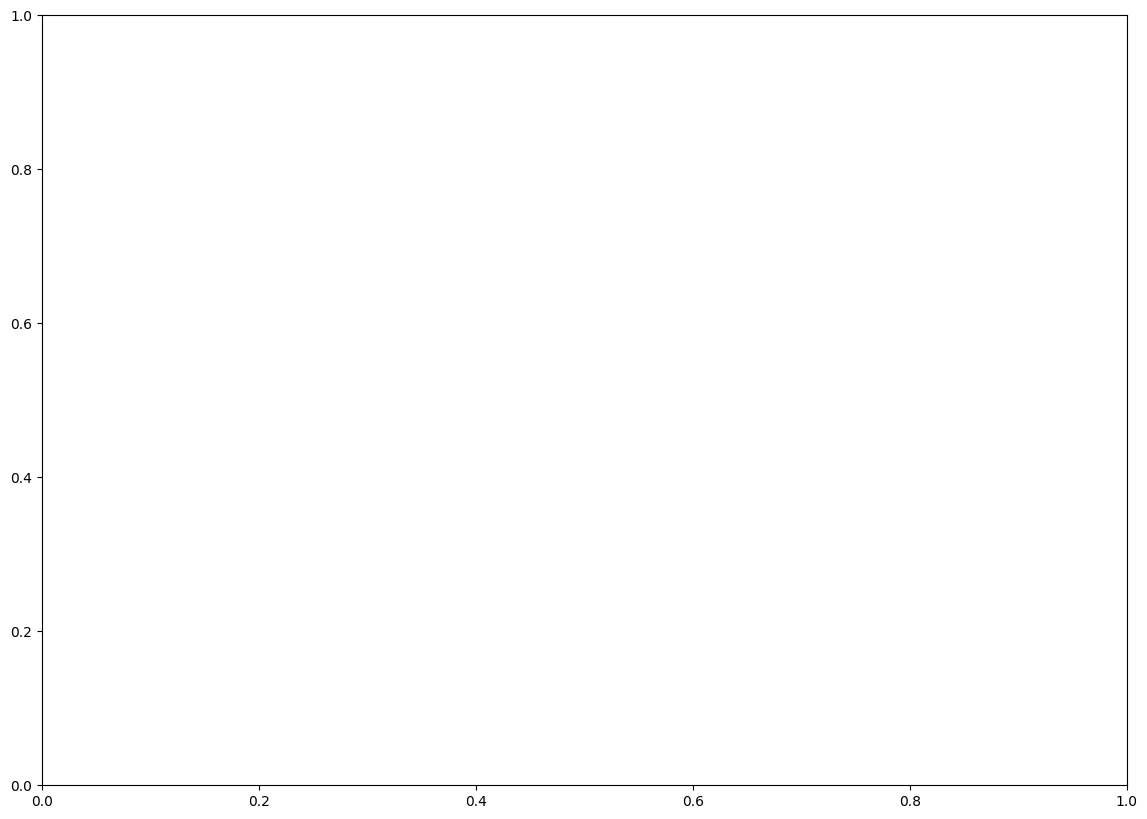

In [29]:
iris.plot.scatter(x="sepal length", y="sepal width", c="class", figsize=(14, 10), s=50, cmap=mpl.colormaps["Greens"]);

Para que pueda darle colores usando una columna de strings (con clases), debemos definir una columna usando el tipo de dato categorico de Pandas:

In [30]:
iris["class_as_categorical"] = iris["class"].astype("category")

In [31]:
iris.dtypes

sepal length             float64
sepal width              float64
petal length             float64
petal width              float64
class                     object
class_as_categorical    category
dtype: object

Si hacemos eso, ahora la columna **class_as_categorical** es categorica, y nos permite graficar el gráfico de dispersión sin perder la información de que clase es cada color

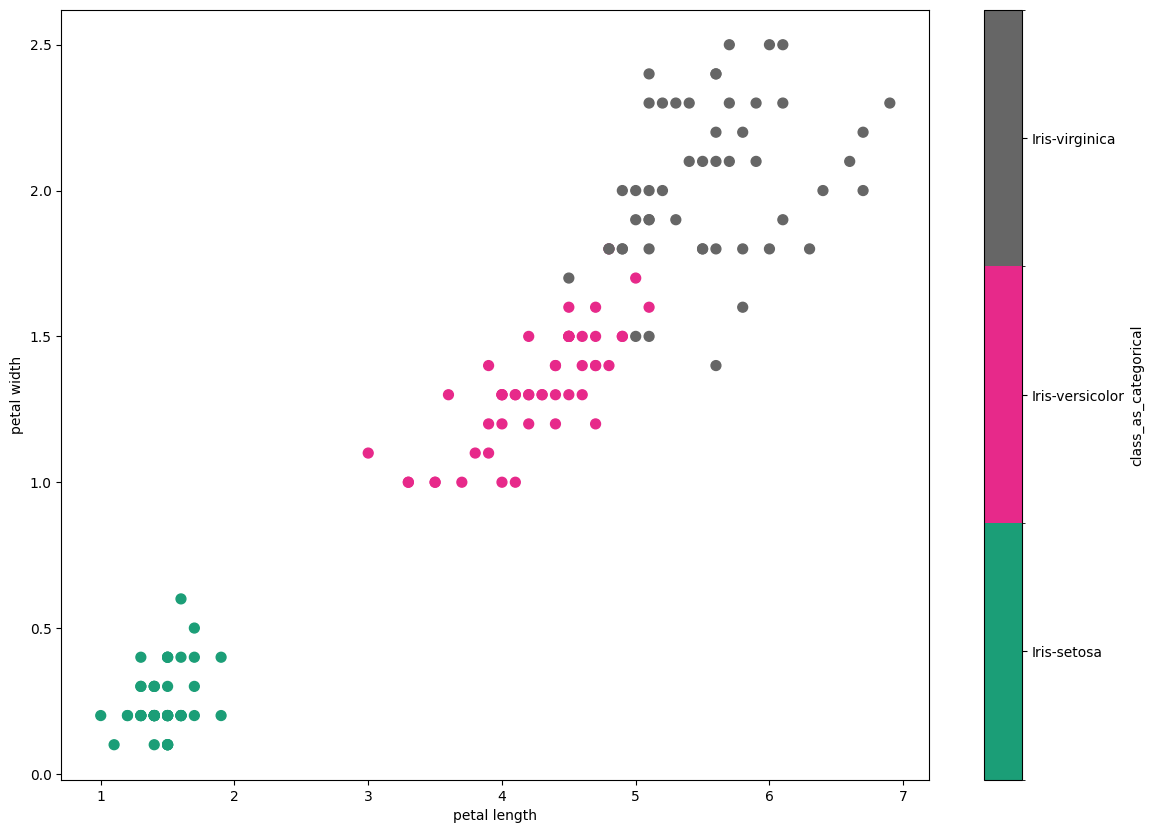

In [32]:
iris.plot.scatter(x="petal length", y="petal width", c="class_as_categorical", figsize=(14, 10), s=50, cmap=mpl.colormaps["Dark2"]);

Por último, si tenemos demasiados puntos, el grafico de dispersión no nos permite ver bien donde están ubicados los puntos. En mucha situaciones de este tipo, se puede usar el gráfico hexbin que nos dá hexagonos con un color dado la densidad de puntos. Esto nos permite ver histograma bidimensional de los datos:

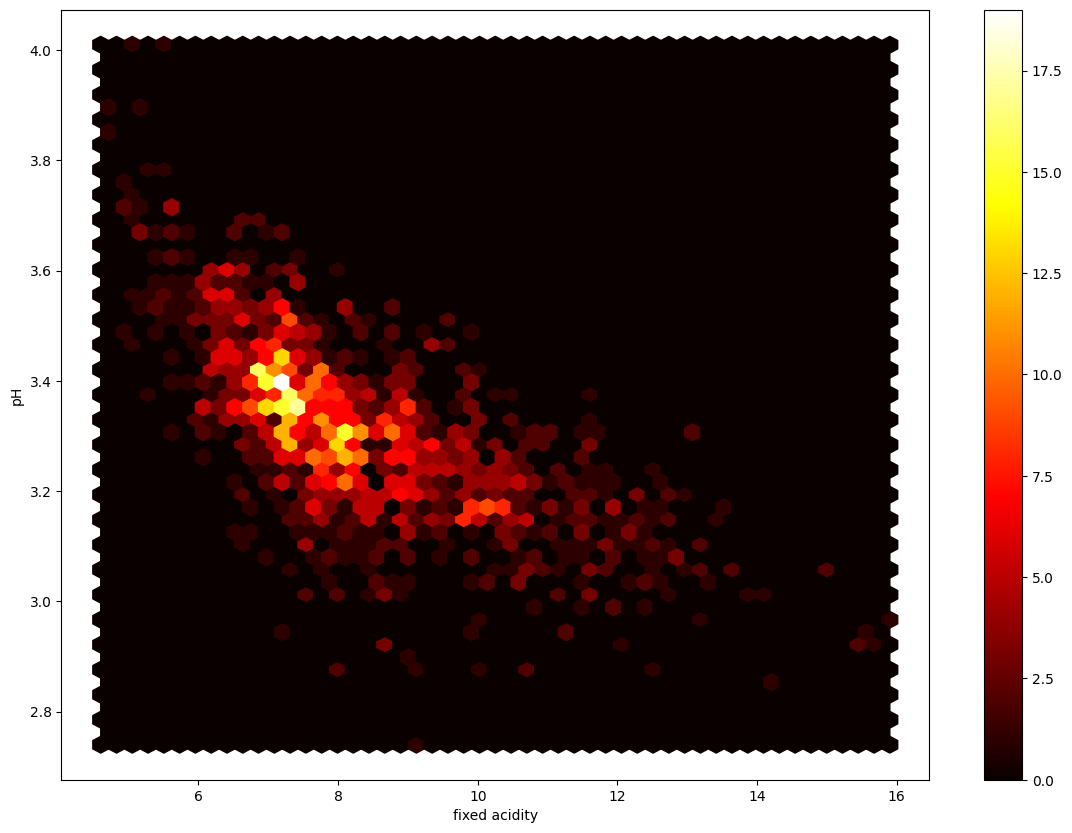

In [33]:
wine.plot.hexbin(x="fixed acidity", y="pH", figsize=(14, 10), cmap=mpl.colormaps["hot"], gridsize=50);